**Avacado Project**

**Problem Statement:**

**Avocado is a fruit consumed by people heavily in the United States.** 

**Content**

**This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV** 

**The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados**

**Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags** 

**The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table**

**Some relevant columns in the dataset:**


**Date - The date of the observation**

**AveragePrice - the average price of a single avocado**

**Type - conventional or organic**

**Year - the year**

**Region - the city or region of the observation**

**Total Volume - Total number of avocados sold**

**4046 - Total number of avocados with PLU 4046 sold**

**4225 - Total number of avocados with PLU 4225 sold**

**4770 - Total number of avocados with PLU 4770 sold**


In [2]:
##Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('avocado.csv')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


**Obseravations on the first go------>**

**Unnamed:0 column is of no use we are going to drop the same**

**For better understanding of Dates we have to split '-' and i have also noticed their is a seprate column for year is given we will drop the same after corrections in Date**

**Type and Region are having text values we are going to apply Encoder to make sure of conversion of text into numbers**


**4046-4225-4770 are for Hass Avocados which is other variety of avocados we will visualize the same and find conclusions for keeping or dropping the same**



In [3]:
df.drop(columns=['Unnamed: 0'],inplace=True)
df.head(1)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany


**Splitting date into Days/Months/year  and creating new columns for same post creation of new columns i will will delete the Date Column**

In [4]:
df['Year'], df['Month'], df['Day'] = df['Date'].str.split('-').str
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Year,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,2015,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,2015,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,2015,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,2015,12,06
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,2015,11,29


**Dropping Date column**

In [5]:
df.drop(columns=['Date'],inplace=True)
df.head(1)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Year,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,2015,12,27


**Checking the Duplicate count in Dataset** 

In [ ]:
###Checking the count of Duplicate values in Dataset
df.duplicated().sum()

**Shape of Dataset**

In [7]:
df.shape

(18249, 15)

**Checking Data type of features and label**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  object 
 10  year          18249 non-null  int64  
 11  region        18249 non-null  object 
 12  Year          18249 non-null  object 
 13  Month         18249 non-null  object 
 14  Day           18249 non-null  object 
dtypes: float64(9), int64(1), object(5)
memory usage: 2.1+ MB


**Though we have seprated year column we are going to drop the same having int as dtype,post deletion we will convert data type of Year,Month and Day to integer as they are holding integer values**

In [9]:
df.drop(columns=['year'],inplace=True)

In [10]:
df['Year']=df['Year'].astype(int)
df['Month']=df['Month'].astype(int)
df['Date']=df['Day'].astype(int)

**Day cokumn is not necessary as we can Visualize the data through months and years,on a relistic level company is also publishing the data in Month and Year wise.**

**We are dropping the column**

In [11]:
df.drop(columns=['Day'],inplace=True)

**Checking overall health of data**

In [12]:
df.describe()


,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,Year,Month,Date
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899,6.177215,15.662612
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938,3.534130,8.776281
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,1.000000,1.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000,3.000000,8.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000,6.000000,16.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000,9.000000,23.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,12.000000,31.000000


**Overall health of Data is not properly readable through numbers ,we have to visualize the same using this method for better understanding of Dataset**

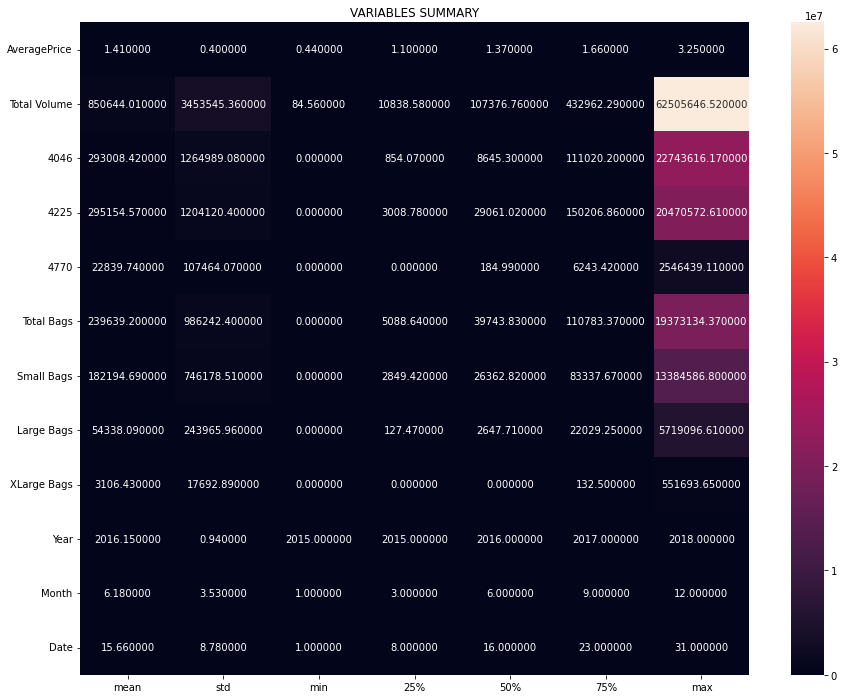

In [13]:
df.describe()
plt.figure(figsize=(15,12))
sns.heatmap(round(df.describe()[1:].transpose(),2),annot=True,fmt='f')
plt.xticks
plt.yticks
plt.title("VARIABLES SUMMARY")
plt.show()

                                              **observations**
**Date,Month,Years are newly tranformed columns overall health is satisfactory**

**XLarge Bags is indicating the presence of outliers and skewness**

**Large Bags are also indicating the presence of Skewness and outliers**

**Small Bags,TotalBags,4770,4225,4046 and total Volume all features are indicating presence of outliers and skewness**

                             
                                         **Conclusion of Observations**
                                         
**We have to plot BOX plot/Stripplot and Distribution curve to Visualize the presence of Outliers and Skewness,if they are present we have to remove Outliers and Skewness for having quality Data in order to build a good model**                                         

**we have to encode values as decided on first go observations for Region and type**                                            

In [14]:
from sklearn.preprocessing import OrdinalEncoder

In [15]:
##Creating object for Encoder
ord_enc = OrdinalEncoder()

In [16]:
df['region']=ord_enc.fit_transform(df['region'].values.reshape(-1,1))

In [17]:
df['type']=ord_enc.fit_transform(df['type'].values.reshape(-1,1))
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month,Date
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0.0,0.0,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0.0,0.0,2015,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0.0,0.0,2015,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0.0,0.0,2015,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0.0,0.0,2015,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1.0,53.0,2018,2,4
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1.0,53.0,2018,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1.0,53.0,2018,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1.0,53.0,2018,1,14


**Encoding part has been Succesfully initiated**

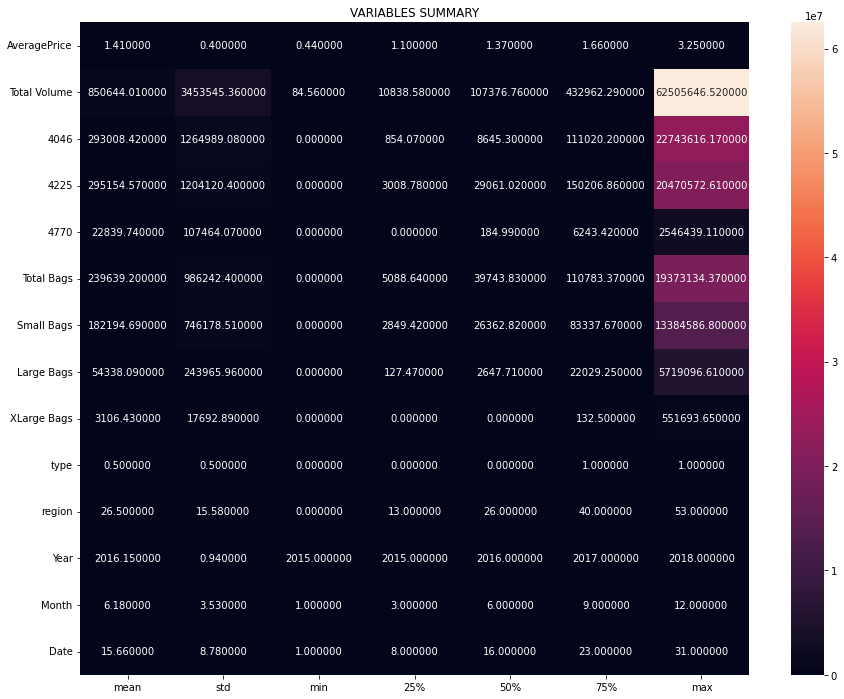

In [18]:
df.describe()
plt.figure(figsize=(15,12))
sns.heatmap(round(df.describe()[1:].transpose(),2),annot=True,fmt='f')
plt.xticks
plt.yticks
plt.title("VARIABLES SUMMARY")
plt.show()

                                            **Observations**
                                            
**Type and Region features are visible as they were holding string values which has been encoded and Data distribution for both has been visualized as satisfactory**                                            

**Univariate Analysis**

In [19]:
df.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'region', 'Year',
       'Month', 'Date'],
      dtype='object')

<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

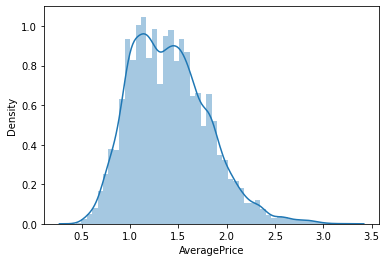

In [20]:
sns.distplot(df['AveragePrice'])

                                        **Observations**

**We can visualize a bit of positive skewness and curve is also indicating the presence of outliers**



<AxesSubplot:xlabel='Total Volume', ylabel='Density'>

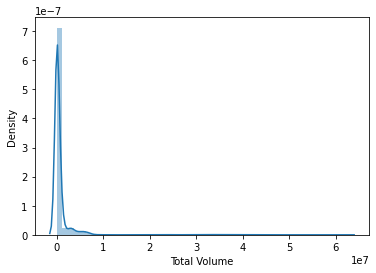

In [21]:
sns.distplot(df['Total Volume'])

                                                 **Observations**

**We can visualize this feature has positively skewed to great extent and is also indicating the presence of outliers**

**Seprating Hass avocado features for visualizing their distribution**

In [105]:
hass_avocado = df[['4046', '4225', '4770']]

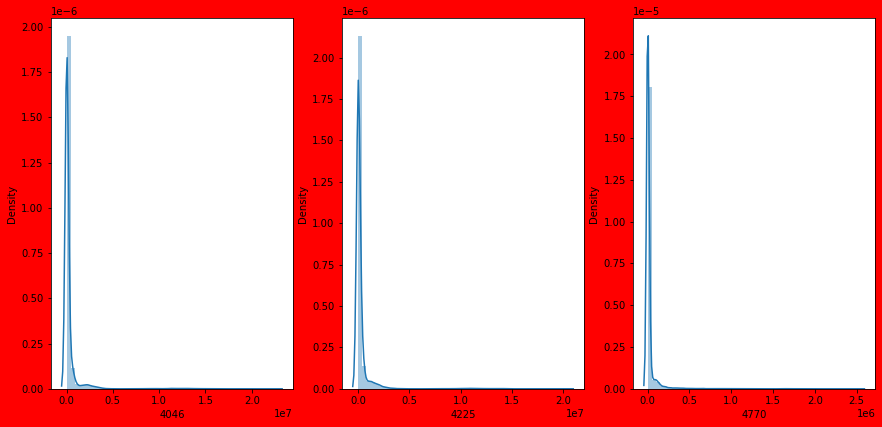

In [23]:
plt.figure(figsize=(20,15),facecolor='red')
plotnumber=1
for column in hass_avocado:
    if plotnumber<=8:
        ax=plt.subplot(2,4,plotnumber)
        sns.distplot(hass_avocado[column])
        
    
    plotnumber+=1
    
plt.show() 

                                                   **Observations**

**All these features related to Hass avocado is showing skewness and presence of outliers it has also been observed that we are predicting the average price for avocado where these features belongs to different type of avocado,we will understand their relationship/correlation with target variable for decisioning of keeping/dropping of these features**


In [24]:
bags_features = df[['Total Bags','Small Bags', 'Large Bags', 'XLarge Bags']]

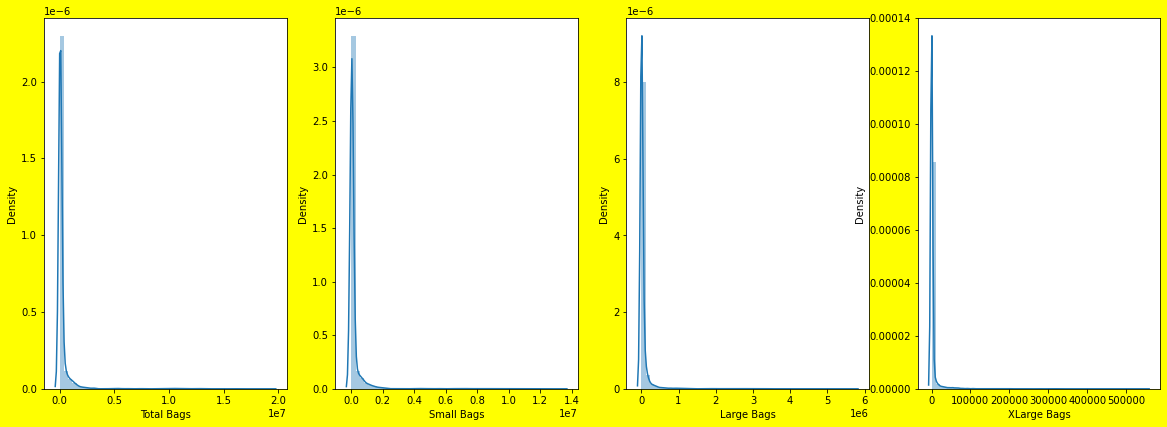

In [25]:
plt.figure(figsize=(20,15),facecolor='yellow')
plotnumber=1
for column in bags_features:
    if plotnumber<=8:
        ax=plt.subplot(2,4,plotnumber)
        sns.distplot(bags_features[column])
        
    
    plotnumber+=1
    
plt.show() 

                                                  **Observations**

**These features are highly skewed and presence of outliers are also visualized as in Bag size are generally based on weights of the particular bag where we are here we re predicting the per unit cost of avocados ,these features might not contribute to label decisioning of same will be taken after checking correlation with target variable**
                                                  

0.0    9126
1.0    9123
Name: type, dtype: int64


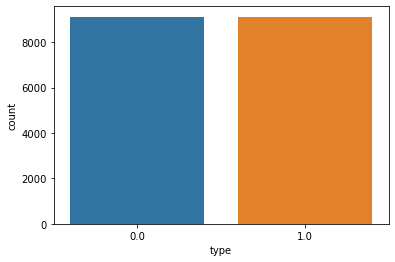

In [26]:
sns.countplot(x='type',data=df)
print(df['type'].value_counts())

**Coventional and organic avocados are almost sharing the same counts***

2017    5722
2016    5616
2015    5615
2018    1296
Name: Year, dtype: int64


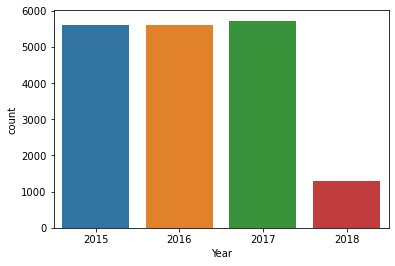

In [27]:
sns.countplot(x='Year',data=df)
print(df['Year'].value_counts())

**in Years,2015-2016-2017 are showing almost equivalent values where in 2018 the count of values are very less**

1     1944
3     1836
2     1728
10    1512
7     1512
5     1512
11    1404
8     1404
4     1404
12    1403
9     1296
6     1294
Name: Month, dtype: int64


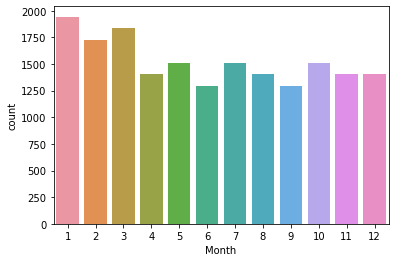

In [28]:
sns.countplot(x='Month',data=df)
print(df['Month'].value_counts())

                                            **Observations**

**In months we can see a balance in 1-3 months than 4 to 8 months 8th and 9th month is showing the same count and this same count has also been visualized 11th and 12 th month**

4     756
11    756
18    755
25    755
1     648
26    648
5     648
12    648
3     648
8     648
15    648
22    648
24    648
17    648
10    648
19    648
7     540
14    540
21    540
28    540
27    540
20    540
29    540
13    540
6     539
2     432
9     432
23    432
30    432
31    432
16    432
Name: Date, dtype: int64


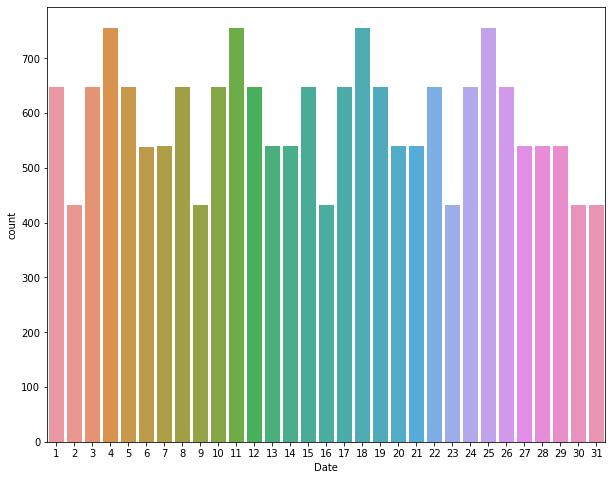

In [29]:
plt.figure(figsize=(10,8))
sns.countplot(x='Date',data=df)
print(df['Date'].value_counts())

                                             **Observations**

**We can visualize a fall in satrting 2nd date of month where same trend has been visualized after  5-6 days consequitively after 2nd date of month**

0.0     338
40.0    338
29.0    338
30.0    338
31.0    338
32.0    338
33.0    338
34.0    338
35.0    338
36.0    338
37.0    338
38.0    338
39.0    338
41.0    338
1.0     338
42.0    338
43.0    338
44.0    338
45.0    338
46.0    338
47.0    338
48.0    338
49.0    338
50.0    338
51.0    338
52.0    338
28.0    338
27.0    338
26.0    338
25.0    338
2.0     338
3.0     338
4.0     338
5.0     338
6.0     338
7.0     338
8.0     338
9.0     338
10.0    338
11.0    338
12.0    338
13.0    338
14.0    338
15.0    338
16.0    338
17.0    338
18.0    338
19.0    338
20.0    338
21.0    338
22.0    338
23.0    338
24.0    338
53.0    335
Name: region, dtype: int64


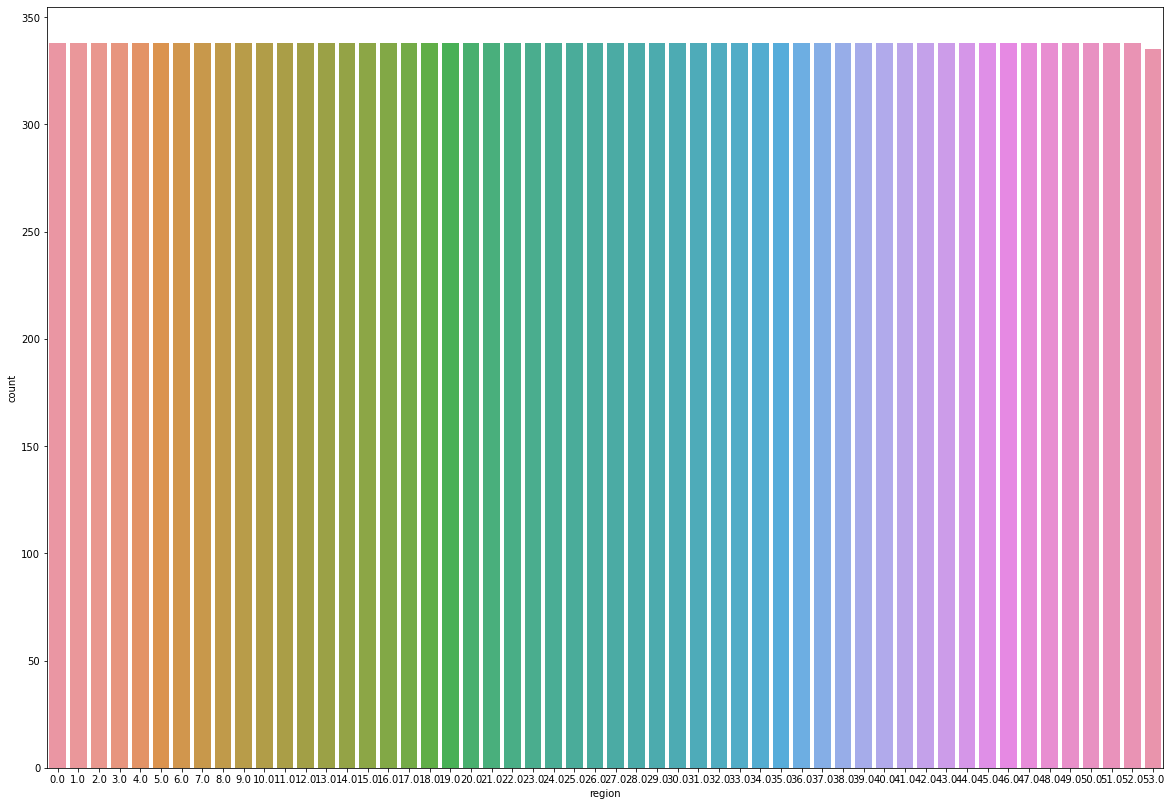

In [30]:
plt.figure(figsize=(20,14))
sns.countplot(x='region',data=df)
print(df['region'].value_counts())

                                              **Observations**

**Same count of values has been visualized in region across,even count of same has been found equal**

**Bivariate Analysis**

<Figure size 864x720 with 0 Axes>

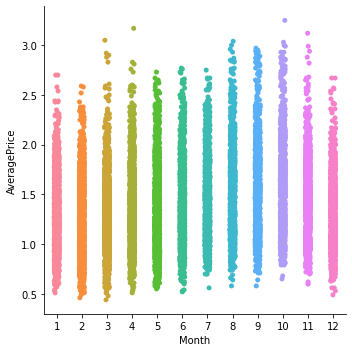

In [34]:
plt.figure(figsize=(12,10))
sns.catplot(x='Month',y='AveragePrice',data=df)
plt.show()

                                      **Observations**
                                      
**In the begining 2 months we can notice that the price of single avocado is much lower and this same trend has also been observed in the mid section of months.**

**August,Aeptember,October is visualized as the highest price giving months for a single peice of Avocados**

**Higher price is directly associated with higher demand,increase in quantity can bring out higher profits in these months**

                                     **Conclusion of Observations**
                                     
**We need to analyse the reason for a higher price on the ground level, we have to nalayse the same as a whole year to get a clear picture of this observation**                                     

<Figure size 864x720 with 0 Axes>

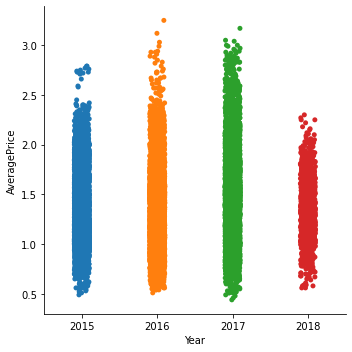

In [35]:
plt.figure(figsize=(12,10))
sns.catplot(x='Year',y='AveragePrice',data=df)
plt.show()

                                             **Observations**
**2016 & 2017 years holds the position of highes price years per Avocado**

**2018 year holds as the year of the minimum average price year per Avocado**
                                             

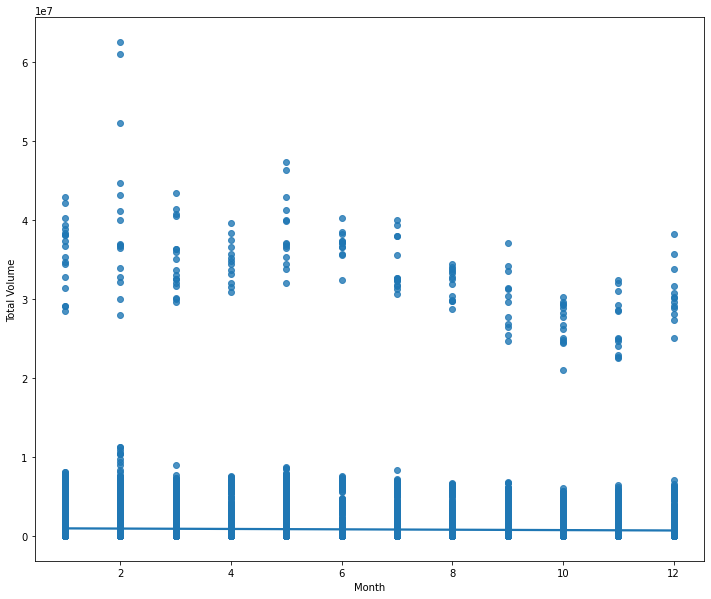

In [69]:
plt.figure(figsize=(12,10))
sns.regplot(x='Month',y='Total Volume',data=df)
plt.show()

                                                 **Observations**

**Maximum amount of avocados has been sold in second month where we can also visualize a trend where maximum quantity has been sold out in earlier months mid of the months are on average basis where the same level of quantity has been observed in 12th month**

<Figure size 864x720 with 0 Axes>

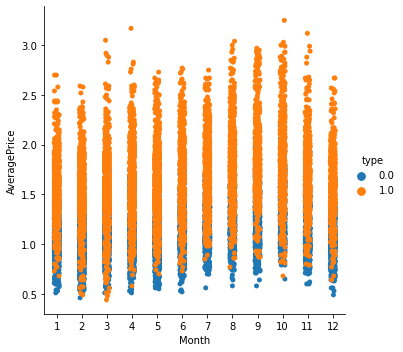

In [76]:
plt.figure(figsize=(12,10))
sns.catplot(x='Month',y='AveragePrice',hue='type',data=df)
plt.show()

                                            **Observations**

**We can visualize that per peice price of Conventional avocados are much lower when we compare them with price of per peice avocado for organic**

**Lets visualize the same year wise to understand the trend**

<Figure size 864x720 with 0 Axes>

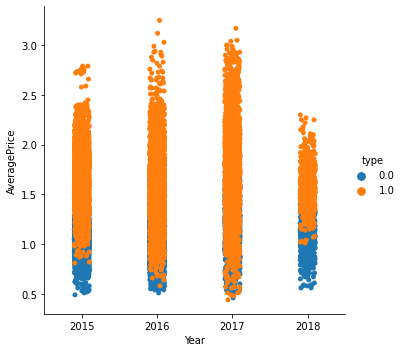

In [77]:
plt.figure(figsize=(12,10))
sns.catplot(x='Year',y='AveragePrice',hue='type',data=df)
plt.show()

                                                 **Observations**
                                                 
**we can visualize the same trend as we have observed month wise their is no change all across the price of Organic avocado is higher as compared to price of conventional avocado**

**In comparison to Month and year same trend has been observed**

<Figure size 1080x720 with 0 Axes>

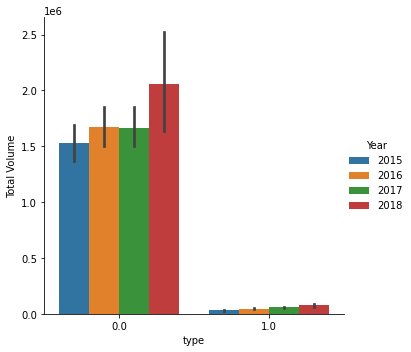

In [78]:
plt.figure(figsize=(15,10))
sns.catplot(x="type", y="Total Volume", hue="Year", kind="bar", data=df)
plt.show()


                                             **Observations**
                                             
**In conentional avocados we have observed a higher number of sales in all four years where their is drastic drop has been observed for organic avocados**                                             

<Figure size 1080x720 with 0 Axes>

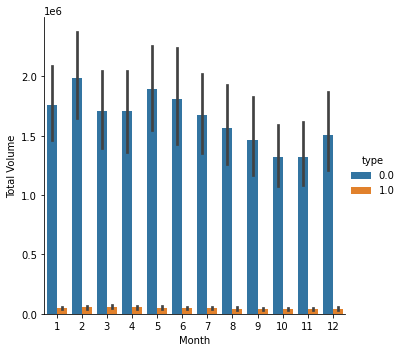

In [95]:
plt.figure(figsize=(15,10))
sns.catplot(x="Month", y="Total Volume", hue="type", kind="bar", data=df)
plt.show()


                                            **Observations**

**Conventional avocados all around a clear edge in terms of prices as compared with organic avocados**

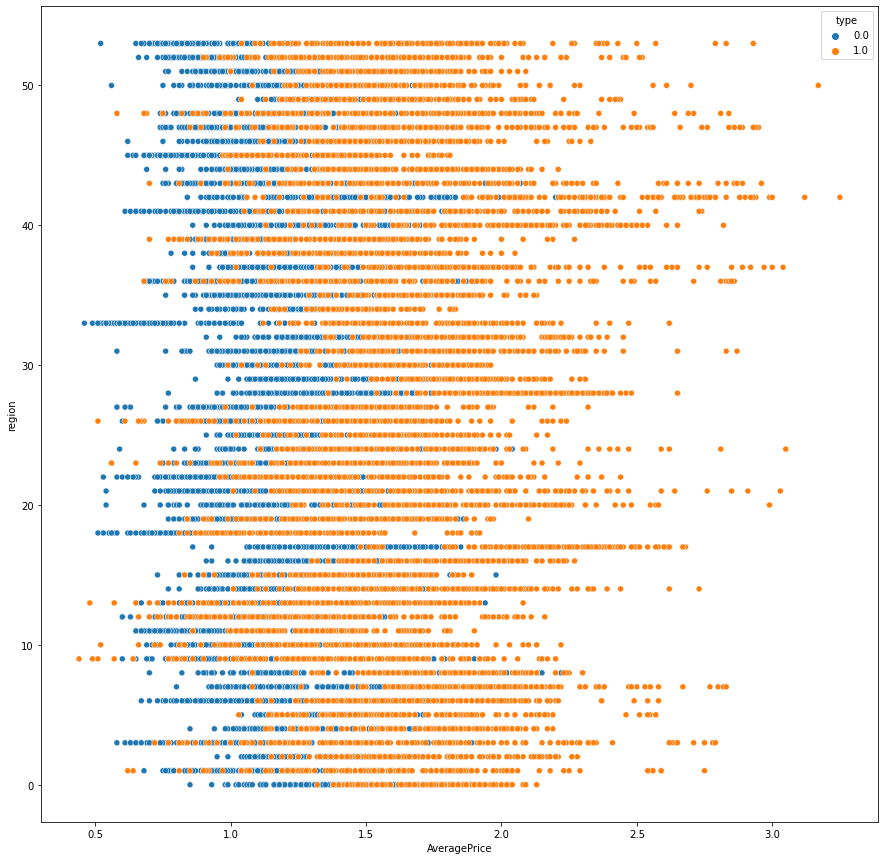

In [90]:
plt.figure(figsize=(15,15))
sns.scatterplot(x='AveragePrice', y='region', hue='type', data=df)
plt.show()


                                               **Observations**
                                               
**We can clearly visualize that organic avocados has a unbeatable edge over conventional avocados region wise their is merely one region in mid where their is a increase in conventional avocados all in all organic avocados are far above in prices**                                             

**we have identified hass avocados features lets check their relationship with target variable for understanding their relationship**

In [103]:
Y=df['AveragePrice']

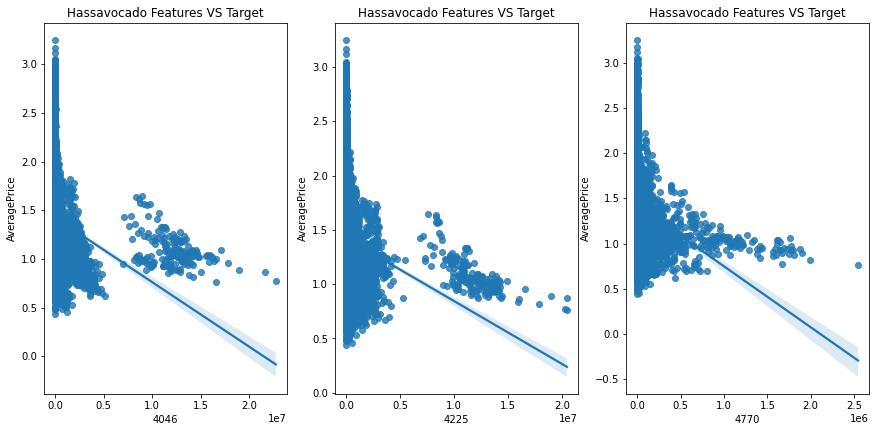

In [111]:
plt.figure(figsize=(20,15))
plotnumber=1
for column in hass_avocado:
    if plotnumber<=8:
        ax=plt.subplot(2,4,plotnumber)
        sns.regplot(hass_avocado[column],Y)
        plt.title('Hassavocado Features VS Target')
        
    
    plotnumber+=1
    
plt.show() 

                                                 **Observations**
                                                 
**As noticed on first go the gtraph has been visualized as these features are merely contributing to our avocados where this hass avocado features are of no use to keep we will drop the sdame after final Multi-Collinearity check**                                                

**Outliers**

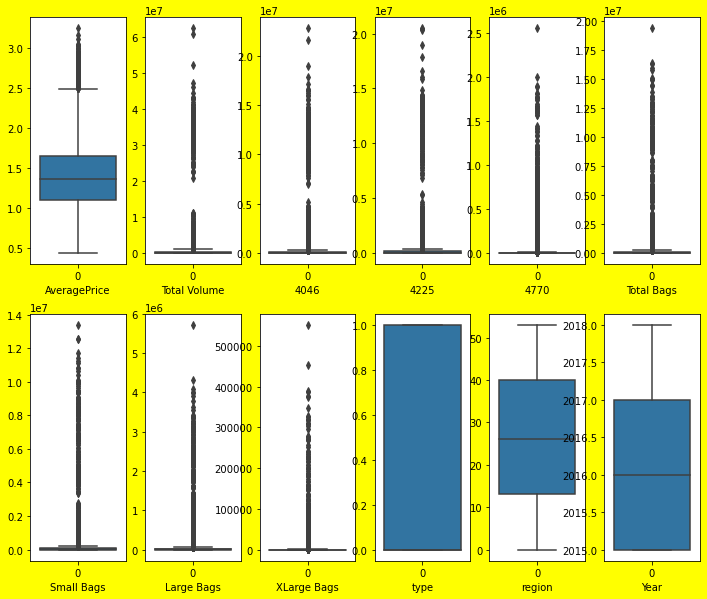

In [112]:
plt.figure(figsize=(12,10),facecolor='Yellow',edgecolor='red')
plotnumber=1
for column in df:
    if plotnumber<=12:
        plt.subplot(2,6,plotnumber)
        ax=sns.boxplot(data=df[column])
        plt.xlabel(column)
        
    plotnumber+=1
    
plt.show()   

                                               **Observations**
**Apart from Region,Year and type we can observe that almost every feature are holding outliers as we have visualized the same in our Variables summary which has been cross checked as of now**                                              



**Removing outliers using Z Statistics****

In [113]:
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy()

Shape of the dataframe before removing outliers:  (18249, 14)
Shape of the dataframe after removing outliers:  (17651, 14)
Percentage of data loss post outlier removal:  3.276891884486821


**We have a acceptable percentage loss after removal of Outliers**

**Correlation**

<AxesSubplot:>

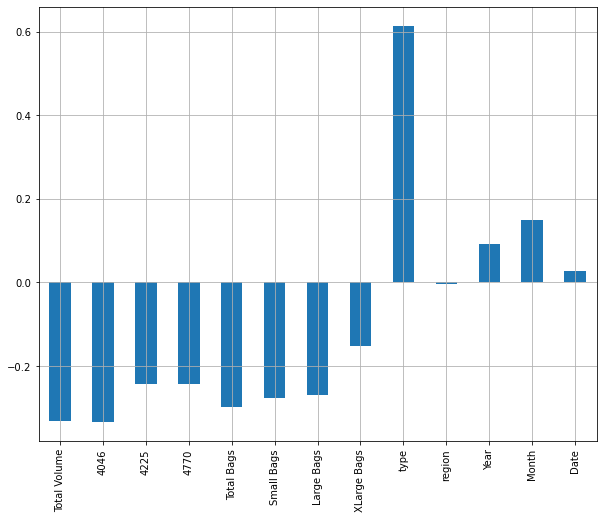

In [114]:
df.drop('AveragePrice',axis=1).corrwith(df.AveragePrice).plot(kind='bar',grid=True,figsize=(10,8))

**We have visualized the pattern is earlier graph which has been cross checked as these hass avocados features are the ones which are on the radar for dropping as of now realistically Total bags are holding a subset of defined bags in data set we are going to drop the same**

In [121]:
df.drop(columns=['4046','4225','4770','Small Bags','Large Bags','XLarge Bags'],axis=1,inplace=True)

In [122]:
df.columns

Index(['AveragePrice', 'Total Volume', 'Total Bags', 'type', 'region', 'Year',
       'Month', 'Date'],
      dtype='object')

**Outliers Recheck**

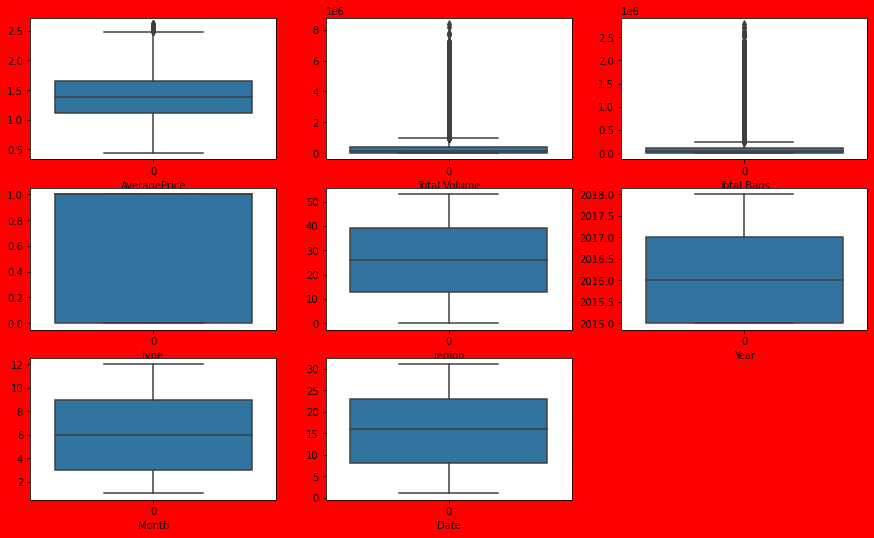

In [125]:
plt.figure(figsize=(15,12),facecolor='red',edgecolor='red')
plotnumber=1
for column in df:
    if plotnumber<=12:
        plt.subplot(4,3,plotnumber)
        ax=sns.boxplot(data=df[column])
        plt.xlabel(column)
        
    plotnumber+=1
    
plt.show()   

**We can clearly Visualize that outliers are in complete controll**

**Skewness Check**

In [129]:
df.skew()

AveragePrice    0.377432
Total Volume    3.767138
Total Bags      4.066771
type           -0.037741
region          0.012798
Year            0.229976
Month           0.107408
Date            0.011778
dtype: float64

In [132]:
from sklearn.preprocessing import PowerTransformer

In [133]:
x= df.drop(columns=['AveragePrice'])
y = df['AveragePrice']

In [136]:
p_transform = PowerTransformer(method = 'yeo-johnson')
x = pd.DataFrame(p_transform.fit_transform(x), columns=x.columns)
x.head()

,Total Volume,Total Bags,type,region,Year,Month,Date
0,-0.086724,-0.544643,-1.019047,-1.830438,-1.258455,1.562972,1.277896
1,-0.158658,-0.505760,-1.019047,-1.830438,-1.258455,1.562972,0.494914
2,0.194697,-0.573123,-1.019047,-1.830438,-1.258455,1.562972,-0.286869
3,0.008174,-0.717639,-1.019047,-1.830438,-1.258455,1.562972,-1.086766
4,-0.191676,-0.691310,-1.019047,-1.830438,-1.258455,1.317526,1.500261


**Visualizing Skewness**

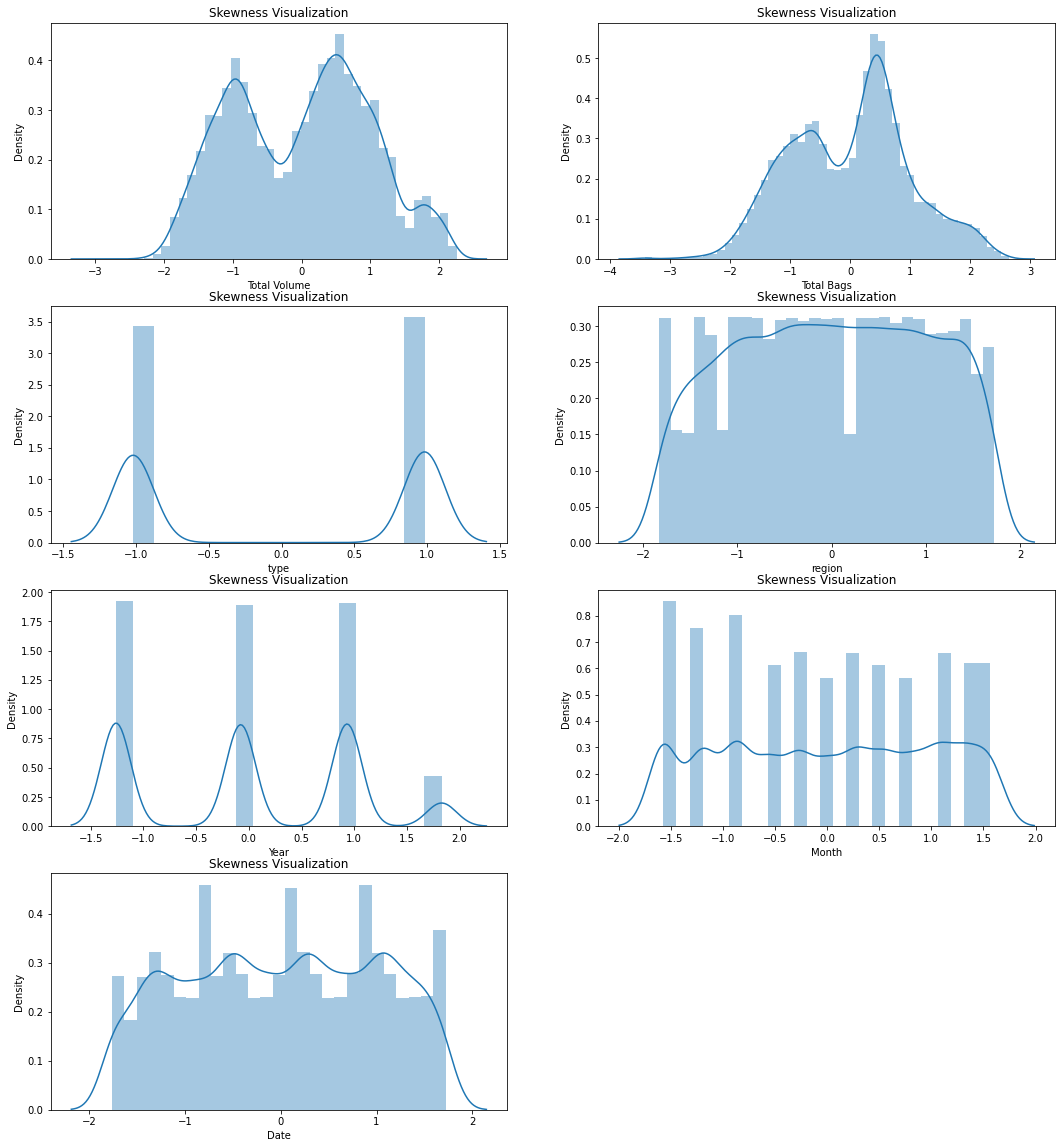

In [151]:
plt.figure(figsize=(18,20))
plotnumber=1
for column in x:
    if plotnumber<=8:
        plt.subplot(4,2,plotnumber)
        ax=sns.distplot(x[column])
        plt.title('Skewness Visualization')
    plotnumber+=1
    
plt.show()    
    
        

**Observations**

**In the skewness check we founded these features are well skewed where as of now by removing skewness using Power Transformer has clearly given a proof that these features are not skewed and we are good to proceed on our Multi-collinearity check**

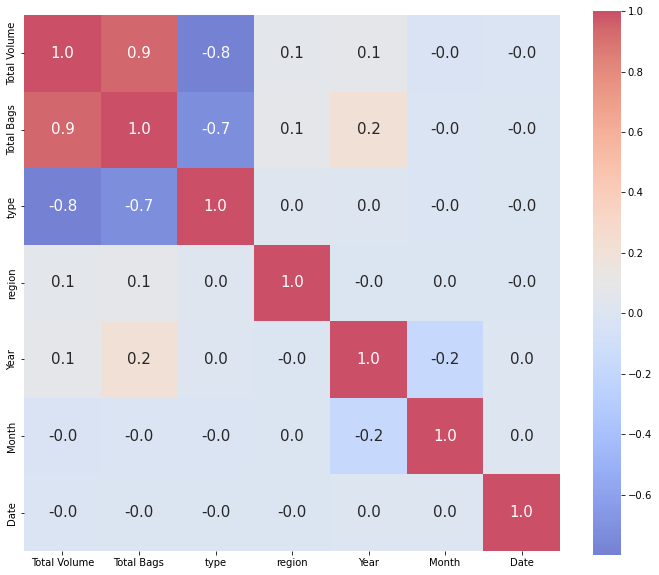

In [152]:
coreleation= x.corr()
plt.figure(figsize=(12,10))
sns.heatmap(coreleation,cbar=True,square=True,annot=True,fmt='.1f',annot_kws={'size': 15},xticklabels=x.columns,yticklabels=x.columns,alpha=0.7,cmap= 'coolwarm')
plt.show()

                                          **Observations**
                                          
**Total volume and Total bags are showing above my threshold limit of 80%,we need to Visualize both the features with Target variable in order to understand which features is less correlated with our Target variable**

**Rest in other features Total volume and type are highly negatively correlated superseeding Total bags and Type** 

In [155]:
Multi_collinear = x[['Total Volume','Total Bags']]

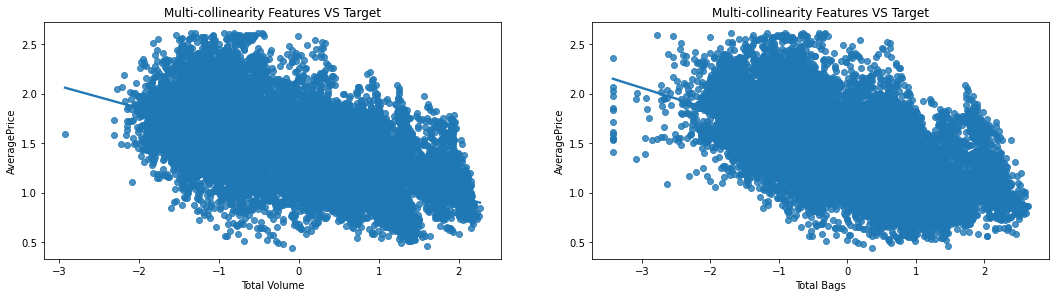

In [166]:
plt.figure(figsize=(18,20))
plotnumber=1
for column in Multi_collinear:
    if plotnumber<=8:
        plt.subplot(4,2,plotnumber)
        ax=sns.regplot(Multi_collinear[column],y)
        plt.title('Multi-collinearity Features VS Target')
    plotnumber+=1
    
plt.show()   

**Both of them are showing the exact trend with our Target Variable hence we cannot drop any of this column and where realistically the quantity of bags has also a relationship with Total volume but both have different scale of measurment we can not delete any of the column**

# VIF

In [164]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [165]:
vif_data = pd.DataFrame()
vif_data["Features List"]=x.columns
vif_data["VIF Value"]=[variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]
vif_data

,Features List,VIF Value
0,Total Volume,13.469652
1,Total Bags,11.121021
2,type,2.888939
3,region,1.022029
4,Year,1.278987
5,Month,1.044044
6,Date,1.000506


**On total bags and Total Volume we have alredy taken decision through our visualization rest all columns are well under controll and we are good to proceed for Model Building post our final visualization of every column**

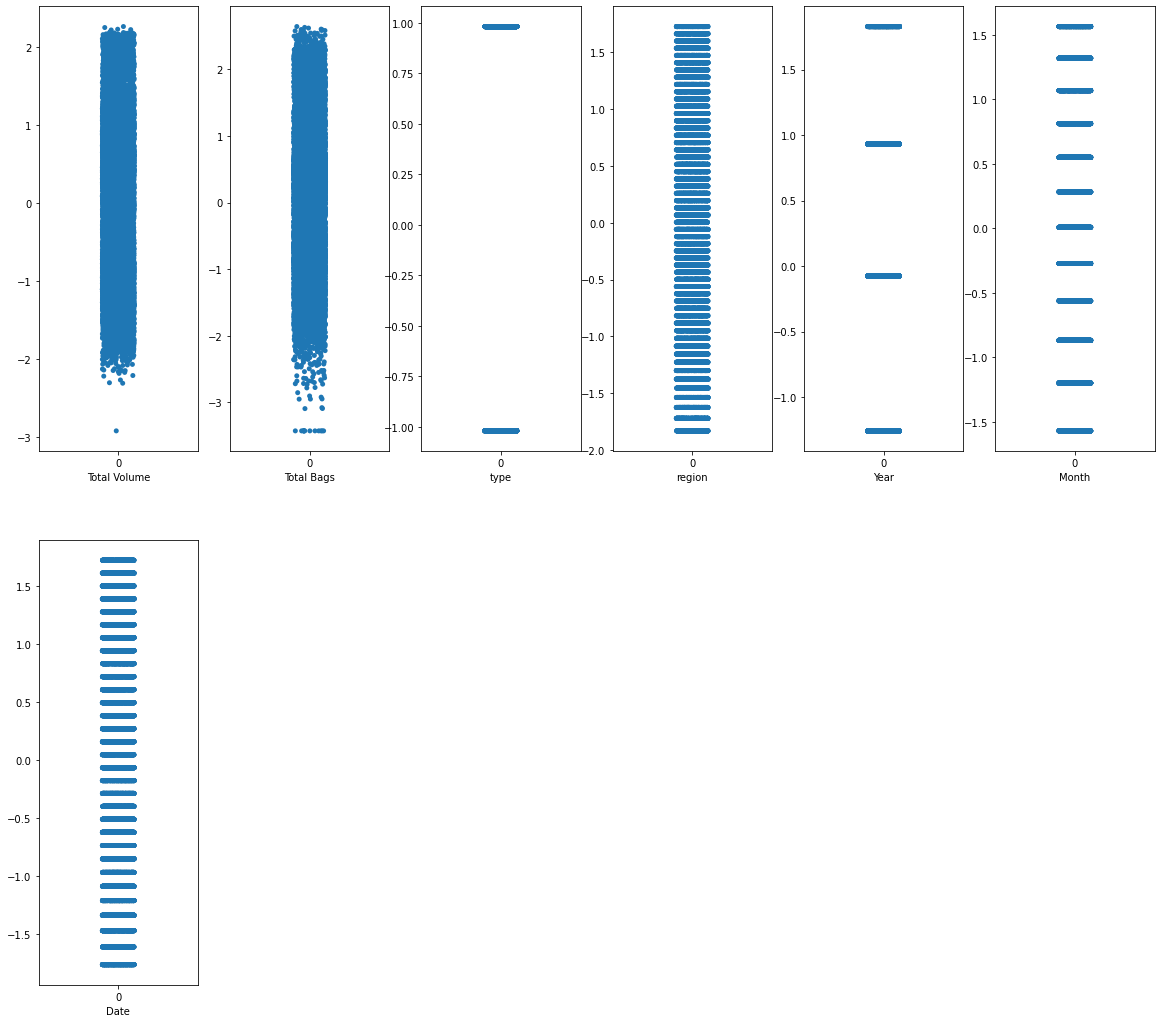

In [169]:
plt.figure(figsize=(20,18))
plotnumber=1
for column in x:
    if plotnumber<=12:
        plt.subplot(2,6,plotnumber)
        ax=sns.stripplot(data=x[column])
        plt.xlabel(column)
        
    plotnumber+=1
    
plt.show()   

**We are well satisfied after  our Visualization all these features are not skewed and their is no sense of outliers in higher and lower side**

# Model building Regression

In [187]:
##Importing necessary Libraries
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

In [173]:
lr=LinearRegression()

**Finding the best Random state and maximum accuracy**

In [174]:
maxAccu=0
maxRS=0

for i in range(1, 1000):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=i)
    lr=LinearRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    r2 = r2_score(y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best r2 score is", maxAccu,"on Random State", maxRS)

Best r2 score is 0.49101901783543533 on Random State 106


In [175]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=106)

In [176]:
# Regression Model Function

def reg(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=106)
    
    #Training the model
    model.fit(x_train, y_train)
    
    #Predicting Y_test
    pred = model.predict(x_test)
    
    #RMSE
    rmse = mean_squared_error(y_test, pred, squared=False)
    print("RMSE Score is:", rmse)
    
    #R2 score
    r2 = r2_score(y_test, pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    
    #CV Score
    cv_score = (cross_val_score(model, x, y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    #Difference
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score is", result)

**I have defined a function for splitting of the Training and Testing features alongwith Target, then it trains the model soon after training it predicts the Target and calculates RMSE score with R2 score alongwith this it calculates the Cross Validation score and finally it finds the difference between the R2 score and Cross Validation score.**

**Linear Regression**

In [178]:
#Linear regression
model=LinearRegression()
reg(model, x, y)

RMSE Score is: 0.2789577512651926
R2 Score is: 49.101901783543525
Cross Validation Score: 8.714913439786391
R2 Score - Cross Validation Score is 40.38698834375713


**Ridge regression**

In [179]:
# Ridge Regression

model=Ridge(alpha=1e-2, normalize=True)
reg(model, x, y)

RMSE Score is: 0.27927716985855433
R2 Score is: 48.98527403757157
Cross Validation Score: 9.268840325817616
R2 Score - Cross Validation Score is 39.71643371175396


**Lasso Regression**

In [181]:
#Lasso Regression

model=Lasso(alpha=1e-2, normalize=True, max_iter=1e5)
reg(model, x, y)

RMSE Score is: 0.391010298376262
R2 Score is: -0.0002487736868950208
Cross Validation Score: -115.6669674837169
R2 Score - Cross Validation Score is 115.66671871003001


**Decision Tree Regressor**

In [182]:
# Decision Tree Regressor

model=DecisionTreeRegressor(criterion="poisson", random_state=111)
reg(model, x, y)

RMSE Score is: 0.3307946265830306
R2 Score is: 28.428259095330976
Cross Validation Score: -141.31762878487444
R2 Score - Cross Validation Score is 169.74588788020543


**Random Forest Regressor**

In [183]:
# Random Forest Regressor

model=RandomForestRegressor(max_depth=2, max_features="sqrt")
reg(model, x, y)

RMSE Score is: 0.2966102692000663
R2 Score is: 42.456396528844465
Cross Validation Score: -13.353557647190922
R2 Score - Cross Validation Score is 55.80995417603539


**KNeighbors Regressor**

In [184]:
# K Neighbors Regressor

KNeighborsRegressor(n_neighbors=2, algorithm='kd_tree')
reg(model, x, y)

RMSE Score is: 0.2959667760224793
R2 Score is: 42.70580629746227
Cross Validation Score: -9.257328138617343
R2 Score - Cross Validation Score is 51.96313443607961


**Support Vector Regression**

**XGB Regressor**

In [188]:
# XGB Regressor

model=XGBRegressor()
reg(model, x, y)

RMSE Score is: 0.12834897126285372
R2 Score is: 89.22519367109105
Cross Validation Score: 36.73184462676041
R2 Score - Cross Validation Score is 52.493349044330635


**Hyper Parameter Tuning on Final model XGB Regressor**

In [192]:
fmod_param = {'n_estimators' : [400,500],
              'gamma' : [2.0, 3.0],
              'max_depth' : [4, 6],
              'n_jobs' : [-2, -1]
             }

In [193]:
GSCV = GridSearchCV(XGBRegressor(), fmod_param, cv=5)


In [194]:
GSCV.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,


In [195]:
GSCV.best_params_

{'gamma': 2.0, 'max_depth': 6, 'n_estimators': 400, 'n_jobs': -2}

In [196]:
XGB_Model = XGBRegressor(gamma=2.0, max_depth=6, n_estimators=400, n_jobs=-2)
Classifier = XGB_Model.fit(x_train, y_train)
fmod_pred = XGB_Model.predict(x_test)
fmod_r2 = r2_score(y_test, fmod_pred)*100
print("R2 score for the Best Model is:", fmod_r2)

R2 score for the Best Model is: 76.6514895384178


**Saving Regression Model**

In [197]:
import joblib

In [198]:
filename = "Regression_Model.pkl"
joblib.dump(XGB_Model, filename)

['Regression_Model.pkl']

# Classification Model

**Though we have built Linear regression Model but here our label was average Price and in Classification Model we have different Label i.e. we will do some visualization as considering  our label as region**

**In our Regression Model we have covered almost all EDA where we will refer the same here in classig=fication model,the bare minimum left plots will be visualized in Classification Model**

**References can be taken from Regression Model**

In [3]:
df = pd.read_csv('avocado.csv')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [4]:
df.drop(columns=['Unnamed: 0'],inplace=True)
df.head(1)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany


In [5]:
df['Year'], df['Month'], df['Day'] = df['Date'].str.split('-').str


In [6]:
df.drop(columns=['Date'],inplace=True)
df.head(1)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Year,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,2015,12,27


In [7]:
df.drop(columns=['year'],inplace=True)

In [8]:
df.drop(columns=['Day'],inplace=True)

In [9]:
from sklearn.preprocessing import OrdinalEncoder

In [10]:
##Creating object for Encoder
ord_enc = OrdinalEncoder()

In [11]:
df['region']=ord_enc.fit_transform(df['region'].values.reshape(-1,1))

In [12]:
df['type']=ord_enc.fit_transform(df['type'].values.reshape(-1,1))
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0.0,0.0,2015,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0.0,0.0,2015,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0.0,0.0,2015,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0.0,0.0,2015,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0.0,0.0,2015,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1.0,53.0,2018,02
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1.0,53.0,2018,01
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1.0,53.0,2018,01
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1.0,53.0,2018,01


<AxesSubplot:>

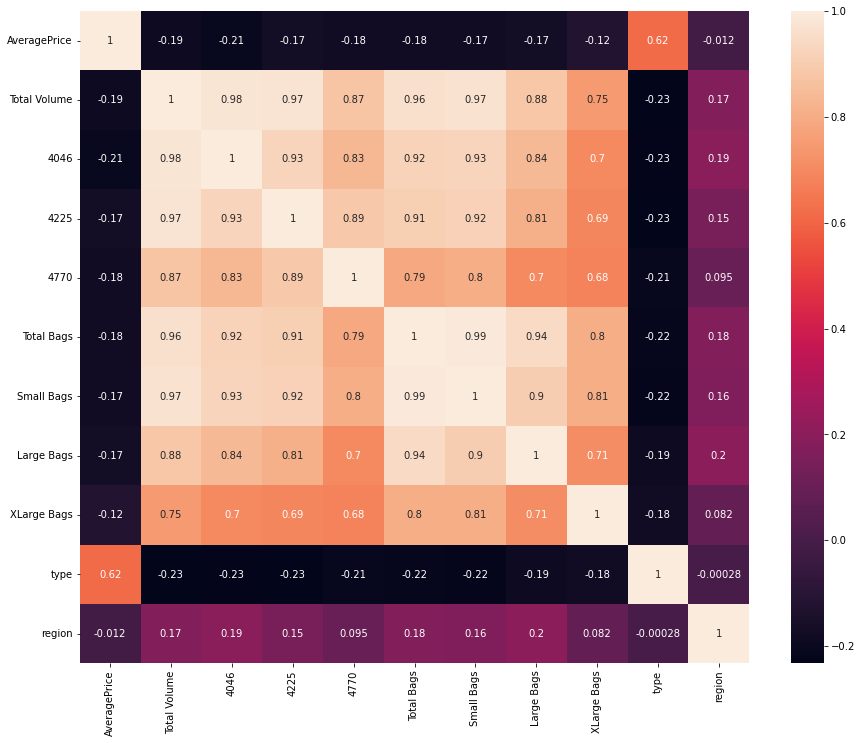

In [13]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),annot=True)

**No change in Observations as considering Region our Label**

**In Linear regression we have dropped certain features as AveragePrice ha ssome other parameters of calculation here we have around 55 regions and we can certainly be sure that all these parameters are somehow important regionwise**

**We are not dropping the same features**

<AxesSubplot:>

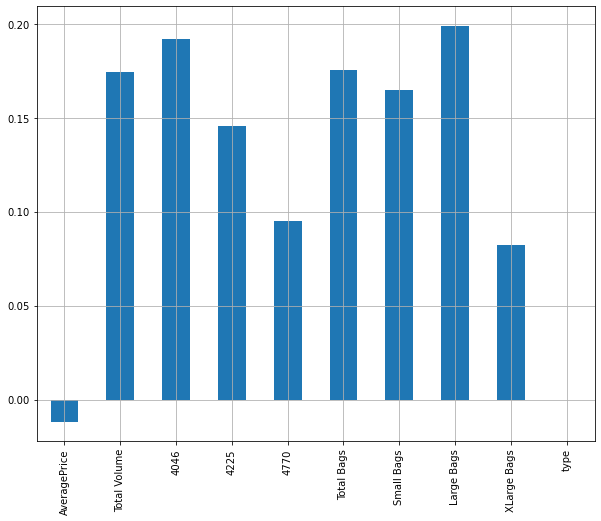

In [14]:
df.drop('region',axis=1).corrwith(df.region).plot(kind='bar',grid=True,figsize=(10,8))

**All features are showing a good correlation with out Target variable**

**We can easily visualize that features in regression were not correlated with targrt variable but here correlation do wxist on a positive note,we are not dropping any of feature**

In [15]:
x= df.drop(columns=['region'])
y = df['region']

**Skewness**

In [17]:
from sklearn.preprocessing import PowerTransformer
p_transform = PowerTransformer(method = 'yeo-johnson')
x = pd.DataFrame(p_transform.fit_transform(x), columns=x.columns)
x.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,Year,Month
0,-0.086248,-0.086605,-0.658619,0.307313,-0.247250,-0.524004,-0.340627,-0.773351,-0.699849,-0.999836,-1.221895,1.494347
1,-0.034022,-0.155746,-0.776870,0.231647,-0.201041,-0.485890,-0.306425,-0.763435,-0.699849,-0.999836,-1.221895,1.494347
2,-1.273938,0.179327,-0.731947,0.579503,-0.007072,-0.552018,-0.366303,-0.750820,-0.699849,-0.999836,-1.221895,1.494347
3,-0.793421,0.003876,-0.634200,0.415100,-0.148322,-0.695449,-0.496853,-0.691865,-0.699849,-0.999836,-1.221895,1.494347
4,-0.219440,-0.187640,-0.685293,0.224806,-0.137918,-0.669157,-0.477201,-0.600975,-0.699849,-0.999836,-1.221895,1.278438


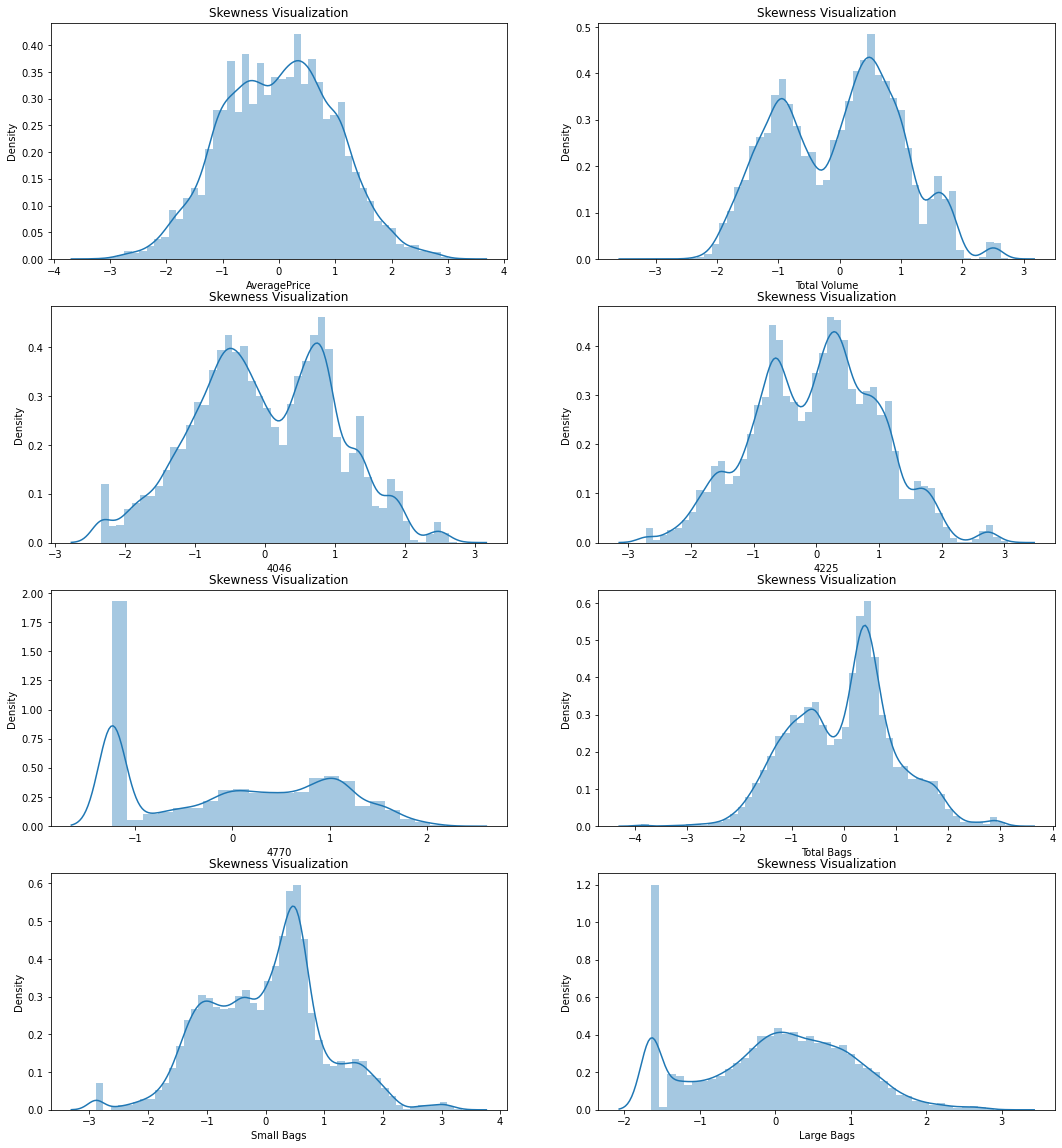

In [18]:
plt.figure(figsize=(18,20))
plotnumber=1
for column in x:
    if plotnumber<=8:
        plt.subplot(4,2,plotnumber)
        ax=sns.distplot(x[column])
        plt.title('Skewness Visualization')
    plotnumber+=1
    
plt.show()    
    

**Observations**

**Skewness is in complete controll**

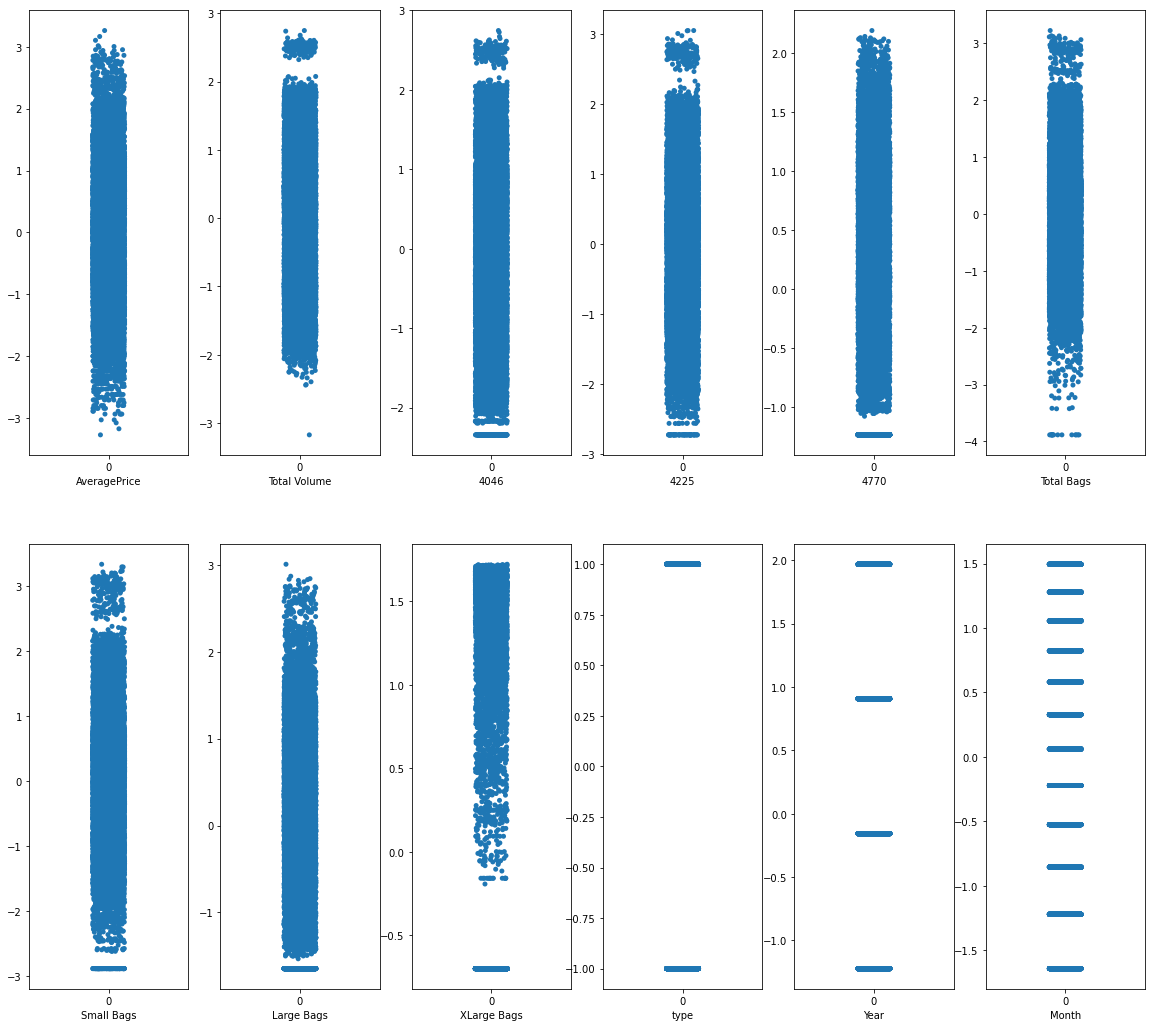

In [19]:
plt.figure(figsize=(20,18))
plotnumber=1
for column in x:
    if plotnumber<=12:
        plt.subplot(2,6,plotnumber)
        ax=sns.stripplot(data=x[column])
        plt.xlabel(column)
        
    plotnumber+=1
    
plt.show()   

**It has been visualized that skewness and outliers for features are in controll**

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [21]:
vif_data = pd.DataFrame()
vif_data["Features List"]=x.columns
vif_data["VIF Value"]=[variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]
vif_data

,Features List,VIF Value
0,AveragePrice,2.353528
1,Total Volume,49.628127
2,4046,6.881346
3,4225,11.911137
4,4770,4.287361
5,Total Bags,33.127590
6,Small Bags,16.078598
7,Large Bags,3.493445
8,XLarge Bags,2.163389
9,type,4.112265


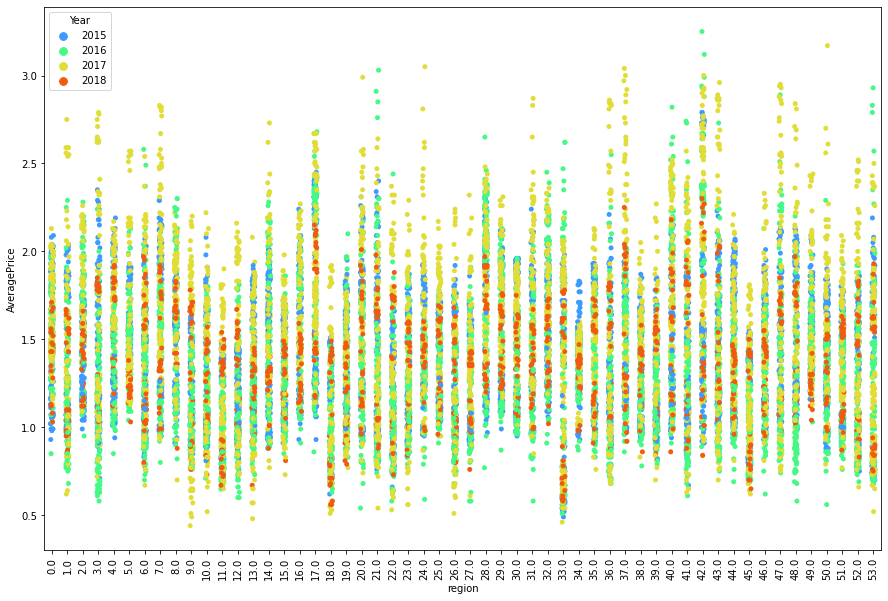

In [22]:
plt.figure(figsize=(15,10))
sns.stripplot(x='region', y='AveragePrice', hue="Year", data=df, palette="turbo")
plt.xticks(rotation=90)
plt.show()

**Regionwise year 2016 has been visualized amongst the most contributing yeat to every region where year 2018 has a.lso showns immense penetration for the Price calculation regionwise**

**Rest other years has been visualized as normal and Average**

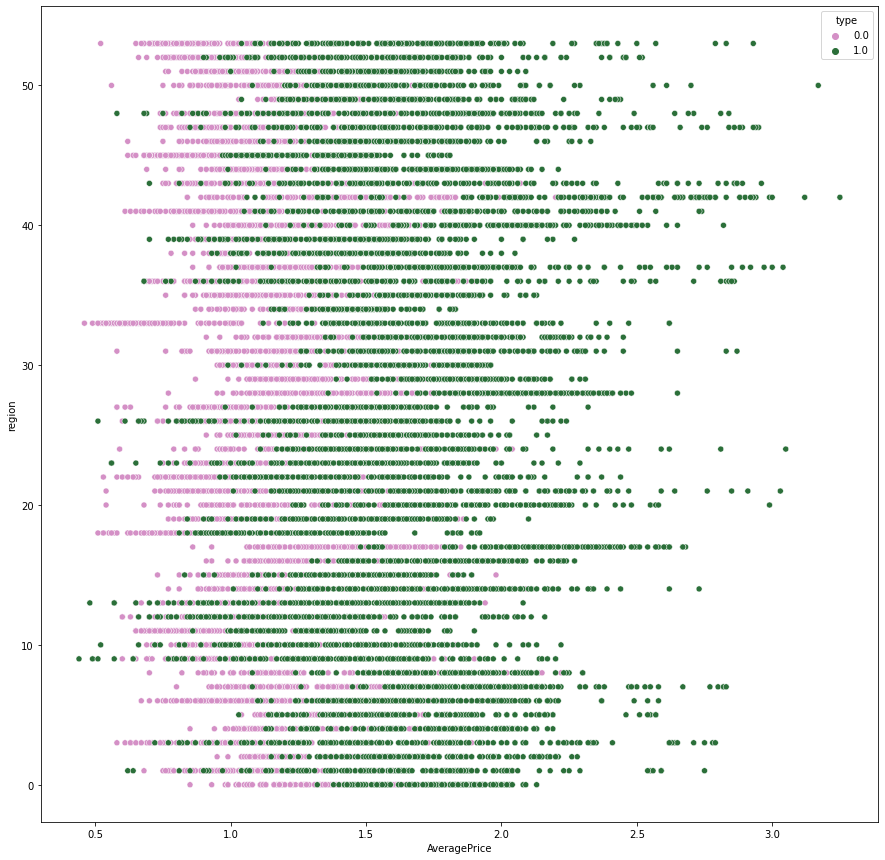

In [23]:
plt.figure(figsize=(15,15))
sns.scatterplot(x='AveragePrice', y='region', hue='type', data=df, palette="cubehelix_r")
plt.show()


**Almost same trend has been visualized as Linear regression**

**Here regionwise interesting fact is organic avocado has shown excellent penetration in every region as compared with conventional avocado**


**Most of the EDA part concerning  has been visualized in Regression model rest we have compared the facts which were important from region prospects**

**Lets proceed with Model building**

In [52]:
#Importing necessary Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

**Scaling of Data using Standard Scaler**

In [25]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,Year,Month
0,-0.086248,-0.086605,-0.658619,0.307313,-0.247250,-0.524004,-0.340627,-0.773351,-0.699849,-0.999836,-1.221879,1.494347
1,-0.034022,-0.155746,-0.776870,0.231647,-0.201041,-0.485890,-0.306425,-0.763435,-0.699849,-0.999836,-1.221879,1.494347
2,-1.273938,0.179327,-0.731947,0.579503,-0.007072,-0.552018,-0.366303,-0.750820,-0.699849,-0.999836,-1.221879,1.494347
3,-0.793421,0.003876,-0.634200,0.415100,-0.148322,-0.695449,-0.496853,-0.691865,-0.699849,-0.999836,-1.221879,1.494347
4,-0.219440,-0.187640,-0.685293,0.224806,-0.137918,-0.669157,-0.477201,-0.600975,-0.699849,-0.999836,-1.221879,1.278438


**Finding Maximum accuracy with Random_State**

In [38]:
maxAccu=0
maxRS=0

for i in range(1,500):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=i)
    knn=KNeighborsClassifier()
    knn.fit(x_train, y_train)
    pred = knn.predict(x_test)
    acc_score = (accuracy_score(y_test, pred))*100
    
    if acc_score>maxAccu:
        maxAccu=acc_score
        maxRS=i

print("Best accuracy score is", maxAccu,"on Random State", maxRS)

Best accuracy score is 83.82642998027613 on Random State 476


**Splitting Data for Trainng and Testing**

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=476)


**Defining a function to print Accuracy_score,CV_Score,printing Classification_report and finally the result by deducting Accuracy score from CV score to choose the least difference model**

In [40]:
# Classification Model Function

def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=184)
    
    # Training the model
    model.fit(x_train, y_train)
    
    # Predicting Y_test
    pred = model.predict(x_test)
    
    # Accuracy Score
    acc_score = (accuracy_score(y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Classification Report
    class_report = classification_report(y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, x, y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

**KNeighbors Classifier**

In [41]:
# KNeighbors Classifier

model=KNeighborsClassifier(n_neighbors=15)
classify(model, x, y)

Accuracy Score: 73.15362699978084

Classification Report:
               precision    recall  f1-score   support

         0.0       0.69      0.96      0.80        85
         1.0       0.55      0.57      0.56       105
         2.0       0.73      0.91      0.81        88
         3.0       0.81      0.81      0.81        79
         4.0       0.82      0.75      0.78       103
         5.0       0.72      0.72      0.72        85
         6.0       0.91      0.86      0.88        78
         7.0       0.60      0.77      0.67        84
         8.0       0.84      0.84      0.84        87
         9.0       0.58      0.71      0.64        73
        10.0       0.55      0.53      0.54        91
        11.0       0.65      0.94      0.77        64
        12.0       0.87      0.88      0.88        76
        13.0       0.60      0.62      0.61        79
        14.0       0.83      0.95      0.88        80
        15.0       0.91      0.86      0.88        92
        16.0       0.8

**Support Vector Classifier**

In [42]:
model=SVC(C=1.0, kernel='rbf', gamma='auto', random_state=42)
classify(model, x, y)

Accuracy Score: 82.75257506026736

Classification Report:
               precision    recall  f1-score   support

         0.0       0.80      0.96      0.87        85
         1.0       0.70      0.67      0.68       105
         2.0       0.97      1.00      0.98        88
         3.0       0.81      0.80      0.80        79
         4.0       0.91      0.87      0.89       103
         5.0       0.84      0.81      0.83        85
         6.0       1.00      0.99      0.99        78
         7.0       0.81      0.71      0.76        84
         8.0       0.97      0.95      0.96        87
         9.0       0.72      0.73      0.72        73
        10.0       0.59      0.65      0.62        91
        11.0       0.82      0.95      0.88        64
        12.0       0.93      1.00      0.96        76
        13.0       0.65      0.67      0.66        79
        14.0       0.86      0.96      0.91        80
        15.0       0.99      0.93      0.96        92
        16.0       1.0

**Decision Tree Classifier**

In [43]:
model=DecisionTreeClassifier(random_state=21, max_depth=15)
classify(model, x, y)

Accuracy Score: 70.34845496383959

Classification Report:
               precision    recall  f1-score   support

         0.0       0.67      0.78      0.72        85
         1.0       0.69      0.46      0.55       105
         2.0       0.90      0.89      0.89        88
         3.0       0.80      0.71      0.75        79
         4.0       0.74      0.84      0.79       103
         5.0       0.83      0.65      0.73        85
         6.0       0.87      0.97      0.92        78
         7.0       0.59      0.61      0.60        84
         8.0       0.94      0.87      0.90        87
         9.0       0.64      0.53      0.58        73
        10.0       0.46      0.69      0.55        91
        11.0       0.81      0.86      0.83        64
        12.0       0.81      0.79      0.80        76
        13.0       0.38      0.54      0.45        79
        14.0       0.86      0.60      0.71        80
        15.0       0.95      0.86      0.90        92
        16.0       0.8

**Random Forest Classifier**

In [44]:
# Random Forest Classifier

model=RandomForestClassifier(max_depth=15, random_state=111)
classify(model, x, y)

Accuracy Score: 87.35481043173351

Classification Report:
               precision    recall  f1-score   support

         0.0       0.90      0.93      0.91        85
         1.0       0.83      0.79      0.81       105
         2.0       0.91      0.97      0.94        88
         3.0       0.85      0.90      0.87        79
         4.0       0.95      0.94      0.95       103
         5.0       0.86      0.86      0.86        85
         6.0       0.97      1.00      0.99        78
         7.0       0.82      0.79      0.80        84
         8.0       0.98      0.94      0.96        87
         9.0       0.86      0.82      0.84        73
        10.0       0.76      0.78      0.77        91
        11.0       0.92      0.94      0.93        64
        12.0       0.93      0.93      0.93        76
        13.0       0.74      0.71      0.72        79
        14.0       0.86      0.89      0.87        80
        15.0       0.97      0.96      0.96        92
        16.0       0.9

In [45]:
# XGB Classifier

model=xgb.XGBClassifier(verbosity=0)
classify(model, x, y)

Accuracy Score: 90.00657462195923

Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.87      0.87        85
         1.0       0.87      0.89      0.88       105
         2.0       0.95      0.94      0.95        88
         3.0       0.84      0.91      0.87        79
         4.0       0.93      0.92      0.93       103
         5.0       0.89      0.92      0.90        85
         6.0       0.97      0.97      0.97        78
         7.0       0.89      0.89      0.89        84
         8.0       0.97      0.97      0.97        87
         9.0       0.90      0.84      0.87        73
        10.0       0.83      0.80      0.82        91
        11.0       0.94      0.91      0.92        64
        12.0       0.95      0.95      0.95        76
        13.0       0.81      0.82      0.82        79
        14.0       0.95      0.93      0.94        80
        15.0       0.97      0.96      0.96        92
        16.0       0.9

**HyperParameter Tuning on Final Model**

**Choosing Random forest classifier as the final mode,though their is merely a difference b/w RFC and SVC but Cross validation score is higher  in RFC***

In [53]:
fmod_param = {'criterion' : ["gini", "entropy"],
              'min_samples_leaf' : [2,3,4],
              'min_samples_split' : [2, 3, 4],
              'max_depth' : [4, 6, 8],
              'random_state' : [42, 111, 759]
             }

In [54]:
RSCV = RandomizedSearchCV(RandomForestClassifier(), fmod_param, cv=5)

In [55]:
RSCV.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [4, 6, 8],
                                        'min_samples_leaf': [2, 3, 4],
                                        'min_samples_split': [2, 3, 4],
                                        'random_state': [42, 111, 759]})

In [56]:
RSCV.best_params_

{'random_state': 42,
 'min_samples_split': 4,
 'min_samples_leaf': 2,
 'max_depth': 8,
 'criterion': 'entropy'}

In [59]:
Final_Model = RandomForestClassifier(criterion='entropy', max_depth=8,random_state=4,min_samples_split=4)
Classifier = Final_Model.fit(x_train, y_train)
fmod_pred = Final_Model.predict(x_test)
fmod_acc = (accuracy_score(y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

Accuracy score for the Best Model is: 80.4733727810651


In [64]:
import joblib

In [65]:
filename = "FinalModel_DT.pkl"
joblib.dump(Final_Model, filename)

['FinalModel_DT.pkl']